# From Problem 3.11 of A First Course in Finite Element

In [12]:
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

In [13]:
mesh = IntervalMesh(200, 0, 1)

In [14]:
# Define boundary condition
V = FunctionSpace(mesh, "P", 2)
f = Expression("2 * x[0] * x[0]", degree=1)

u_L = Constant(1)
u_R = Constant(-2)

def boundary_L(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 0, tol)

def boundary_R(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 1, tol)

bc_L = DirichletBC(V, u_L, boundary_L)
bc_R = DirichletBC(V, u_R, boundary_R)

bcs = [bc_L, bc_R]

In [15]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = (dot(grad(v), grad(u)) + v * u)*dx
L = f*v*dx

In [16]:
# Compute solution
u = Function(V)
solve(a == L, u, bcs)

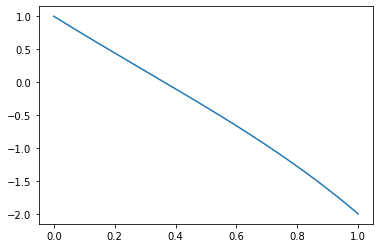

In [17]:
plot(u)

In [31]:
vtkfile = File("poisson/Example_5_FEM_practice_Promblem_3.11.pvd")
vtkfile << u

In [9]:
# Compute error in L2 norm


# Compute maximum error at vertices
vertex_values_u = u.compute_vertex_values(mesh)


In [10]:
print(vertex_values_u)

[ 1.          0.98567126  0.97136717  0.95708735  0.94283145  0.9285991
  0.91438993  0.90020357  0.88603966  0.87189782  0.85777768  0.84367886
  0.82960097  0.81554365  0.8015065   0.78748914  0.77349119  0.75951226
  0.74555195  0.73160988  0.71768564  0.70377885  0.6898891   0.67601599
  0.66215912  0.64831809  0.63449248  0.62068188  0.6068859   0.5931041
  0.57933608  0.56558142  0.5518397   0.53811049  0.52439337  0.51068792
  0.4969937   0.48331029  0.46963725  0.45597414  0.44232053  0.42867598
  0.41504005  0.40141228  0.38779224  0.37417947  0.36057353  0.34697396
  0.33338029  0.31979208  0.30620887  0.29263018  0.27905556  0.26548454
  0.25191664  0.23835139  0.22478832  0.21122695  0.1976668   0.18410738
  0.17054822  0.15698882  0.14342869  0.12986734  0.11630428  0.102739
  0.08917101  0.07559981  0.06202488  0.04844573  0.03486183  0.02127268
  0.00767776 -0.00592345 -0.01953147 -0.03314682 -0.04677004 -0.06040164
 -0.07404216 -0.08769214 -0.10135212 -0.11502263 -0.128